# **Import Library**

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Load dataset langsung dari Google Drive
df = pd.read_csv('https://drive.google.com/uc?id=15RfMD9lNkpS3cVN7j3_dsJKZ8_5RJG5z')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


yang kita gunakan hanya meantemp karna ini melakukan eksperimen univariate

In [5]:
dates = df['date'].values
temp  = df['meantemp'].values

visualisai menggunakan matplotlib agar kita tahu datanya itu bersifat apa kalau dalam case ini berarti datanya musiman (sessional)

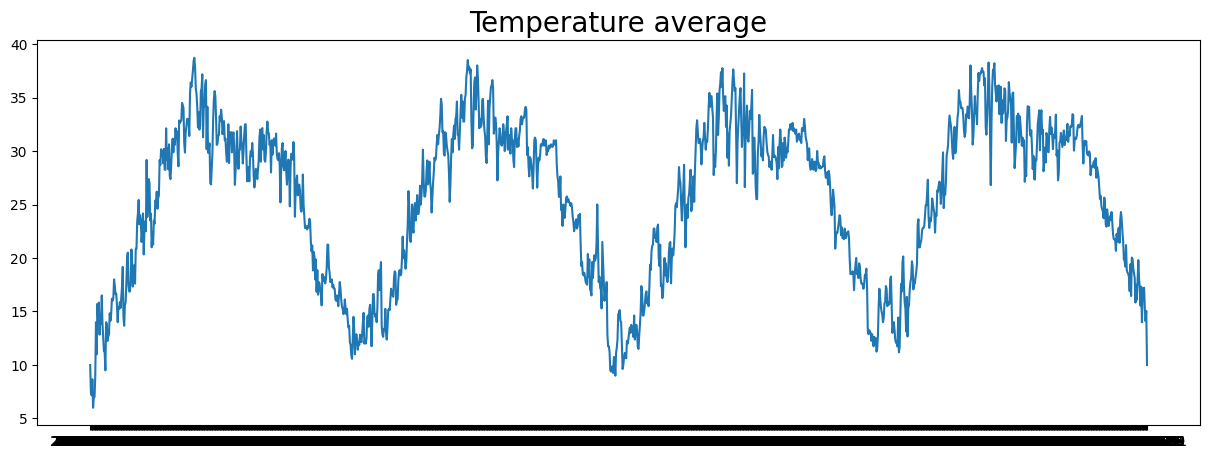

In [6]:
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [7]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [8]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [9]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 25.3903 - mae: 25.8903
Epoch 2/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 24.9466 - mae: 25.4466
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 24.6324 - mae: 25.1324
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 24.6399 - mae: 25.1399
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 24.5543 - mae: 25.0543
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 24.7119 - mae: 25.2119
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 24.5877 - mae: 25.0877
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 24.1027 - mae: 24.6027
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 23.9708 - mae: 24.4708
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 23.6331 - mae: 24.1331
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 23.1136 - mae: 23.6136
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 23.0991 - mae: 23.5991
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 22.3183 - mae: 22.8183
Epoch 

In [10]:
forecast = history.model.predict(train_set)
forecast

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step


array([[13.100124],
       [16.730227],
       [24.935574],
       ...,
       [29.480755],
       [30.835018],
       [30.319899]], dtype=float32)